# Exploring the meta feature space

**Goal: Explore and understand if any meta features are correlated with class and with each other to serve as hints about what to expect in the model building and evaluation phase.**

## Table of contents
1. [Determining which meta features are correlated with each other](#cell1)
2. [Determining which meta features are correlated with class](#cell2)

In [1]:
# Load required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

# Set figure display options
%matplotlib inline
sns.set(context='notebook', style='darkgrid')
sns.set(font_scale=1.3)

Let's begin by loading the dataset containing the "About this project" section of each project.

In [2]:
# Set database credentials
db_name1 = 'section1_db'
usernm = 'redwan'
host = 'localhost'
port = '5432'
#pwd = ''

In [3]:
# Connect to a database
con1 = psycopg2.connect(
    database=db_name1, 
    host='localhost',
    user=usernm,
    password=pwd
)

# Query all data from both campaign sections
sql_query1 = 'SELECT * FROM section1_db;'
section1_df_full = pd.read_sql_query(sql_query1, con1)

Let's separate the funded and unfunded projects into two tables.

In [4]:
# Select the meta features
features = ['num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
            'num_exclms', 'percent_exclms', 'num_apple_words',
            'percent_apple_words', 'avg_words_per_sent', 'num_paragraphs',
            'avg_sents_per_paragraph', 'avg_words_per_paragraph',
            'num_images', 'num_videos', 'num_youtubes', 'num_gifs',
            'num_hyperlinks', 'num_bolded', 'percent_bolded']

# Separate the funded and unfunded projects
funded_projects = section1_df_full[section1_df_full['funded'] == True]
failed_projects = section1_df_full[section1_df_full['funded'] == False]

<a id="cell1"></a>
## 1. Determining which meta features are correlated with each other 

Let's compute the pairwise correlation coefficients between meta features for both funded and unfunded projects.

In [5]:
# Compute pairwise correlation coefficients between each meta feature
funded_corr = funded_projects[features].corr()
failed_corr = failed_projects[features].corr()

Let's set the diagonal to zero and visualize the results in a heatmap.

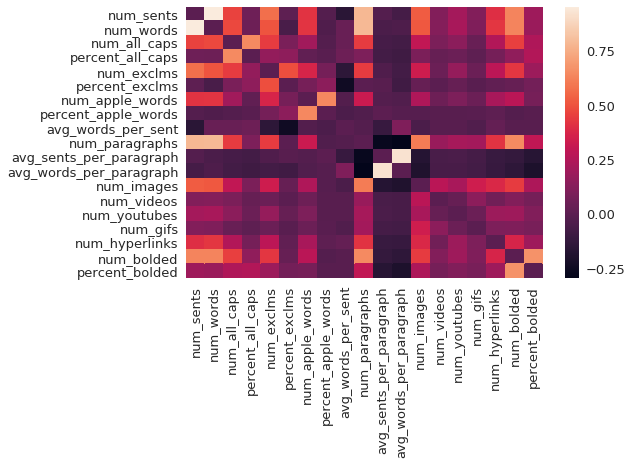

In [6]:
# Set the diagonal values to zero for both correlation coefficient tables
for i in range(len(funded_corr)):
    funded_corr.iloc[i, i] = 0
    failed_corr.iloc[i, i] = 0

# Plot a heatmap of the correlation coefficients of the meta features within 
# funded projects
plt.figure(figsize = (8, 5))
sns.heatmap(funded_corr);

Some of the meta features are correlated with others within funded projects. 

- `num_sents`, `num_paragraphs`, and `num_words` have weak positive correlations with many other ones as these meta features estimate the length of a campaign section
- `num_images` is moderately correlated with `num_paragraphs`, suggesting that creators place images inside paragraph tags
- the % analogs of the absolute meta feature counts are correlated, but that's not very surprising
- `avg_sents_per_paragraph` is correlated strongly with `avg_words_per_paragraph`. This is coincidental but interesting.

Let's turn our attention to unfunded projects.

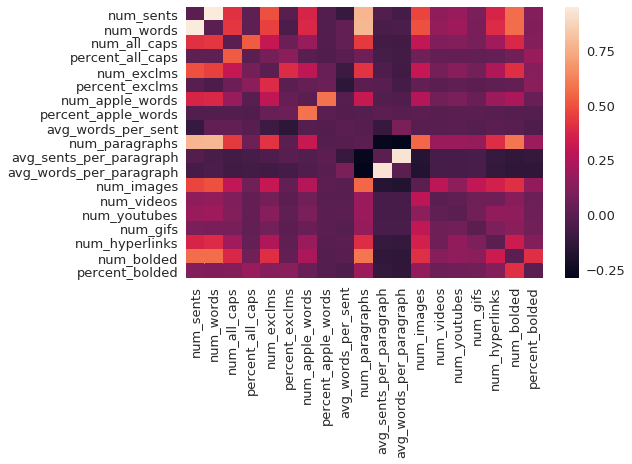

In [7]:
# Plot a heatmap of the correlation coefficients of the meta features within 
# unfunded projects
plt.figure(figsize = (8, 5))
sns.heatmap(failed_corr);

It looks like almost the same meta features are correlated within unfunded projects. Let's take a deeper look at the correlation between `avg_sents_per_paragraph` and `avg_words_per_paragraph`.

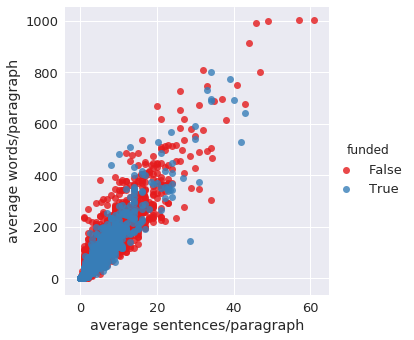

In [8]:
# Plot a scatterplot of the 'avg_sents_per_paragraph' vs. 
# 'avg_words_per_paragraph'
sns.lmplot(
    data=section1_df_full,
    x='avg_sents_per_paragraph',
    y='avg_words_per_paragraph',
    hue='funded',
    fit_reg=False,
    palette='Set1'
).set(xlabel='average sentences/paragraph', ylabel='average words/paragraph');

The trend between these two meta features is really clear. Finally, let's compare the correlation coefficients between funded and unfunded projects to see which pairs of meta features differ the most between classes, if any.

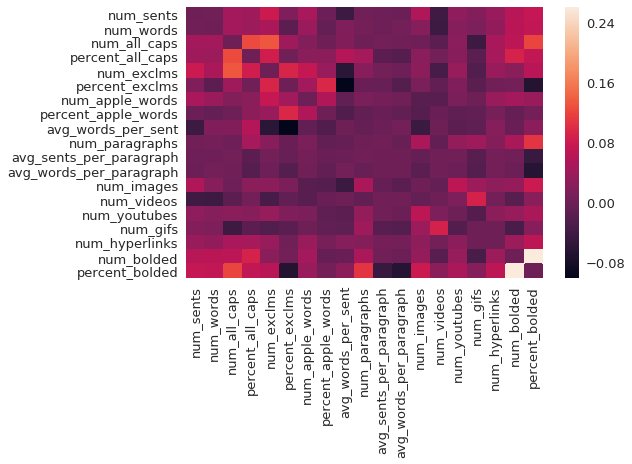

In [9]:
# Plot a heatmap of the correlation coefficients of the meta features between
# funded and unfunded projects
plt.figure(figsize = (8, 5))
sns.heatmap(funded_corr - failed_corr);

While there doesn't seem to be much difference between pairwise correlation coefficients between classes, the correlation between the absolute meta feature counts and their % analogs seems to differ the most.

<a id="cell2"></a>
## 2. Determining which meta features are correlated with class

For each meta feature, let's draw a kernel density estimation plot for funded and unfunded projects to visualize which projects are the most correlated with class. For labeling purposes, let's rename the classes to "Funded" and "Not Funded" and remove the legend title.

In [10]:
# Rename the 'funded' column to ' ' as to hide the legend title
renamed_df = section1_df_full.rename(columns={'funded': ' '})

# Rename the classes
renamed_df.loc[renamed_df[' '] == True, ' '] = 'Funded'
renamed_df.loc[renamed_df[' '] == False, ' '] = 'Not funded'

Let's make font on the axes more legible.

In [11]:
# Make the font scale larger
sns.set(font_scale=2.2)

Now we can draw the plots for each meta feature.

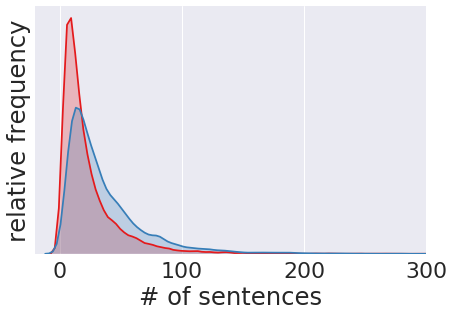

In [12]:
# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot
fig.map(sns.kdeplot, 'num_sents', shade=True) \
    .set(
        xlim=(-20, 300),
        xlabel='# of sentences',
        yticks=[],
        ylabel='relative frequency'
    );

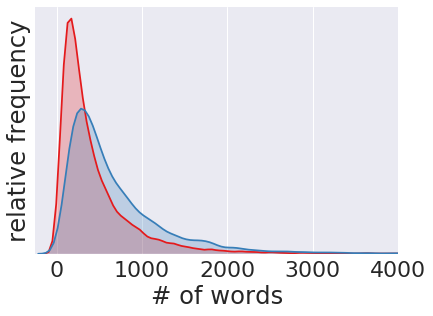

In [13]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot
fig.map(sns.kdeplot, 'num_words', shade=True) \
    .set(
        xlim=(-250, 4000),
        xlabel='# of words',
        yticks=[],
        ylabel='relative frequency'
    );

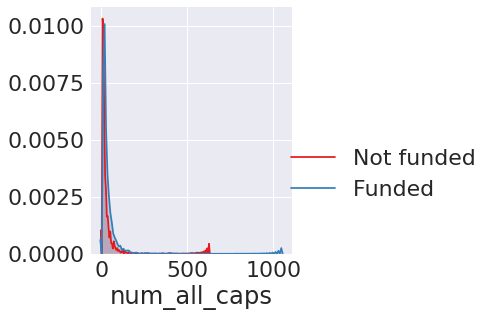

In [14]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'num_all_caps', shade=True).add_legend();

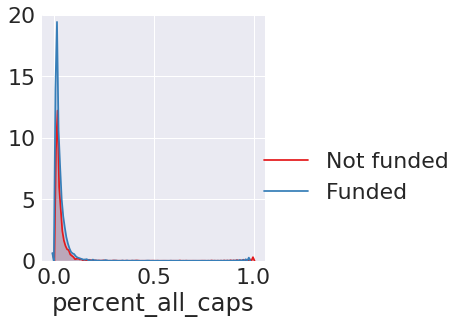

In [15]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'percent_all_caps', shade=True) \
    .add_legend() \
    .set(ylim=(0, 20));

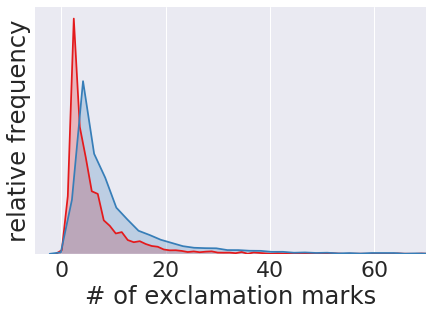

In [16]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot
fig.map(sns.kdeplot, 'num_exclms', shade=True) \
    .set(
        xlim=(-5, 70),
        xlabel='# of exclamation marks',
        yticks=[],
        ylabel='relative frequency'
    );

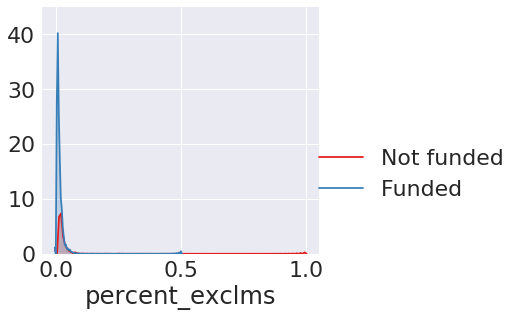

In [17]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'percent_exclms', shade=True) \
    .add_legend() \
    .set(ylim=(0, 45));

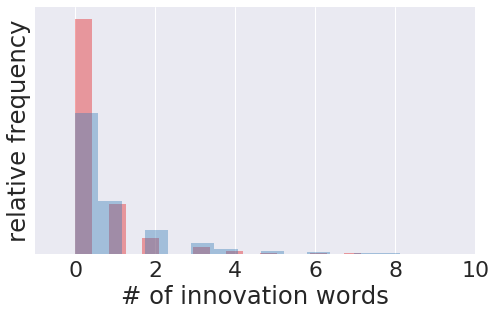

In [18]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1', aspect=1.615)

# Plot a kde plot
fig.map(sns.distplot, 'num_apple_words', kde=False) \
    .set(
        xlim=(-1, 10),
        xlabel='# of innovation words',
        yticks=[],
        ylabel='relative frequency'
    );

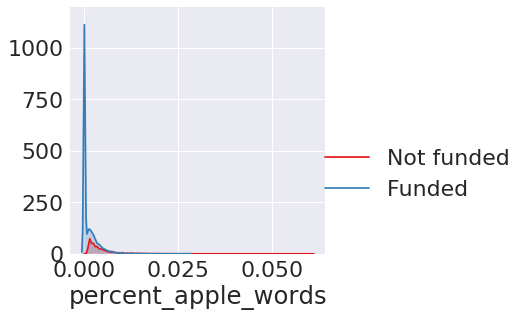

In [19]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'percent_apple_words', shade=True) \
    .add_legend() \
    .set(ylim=(0, 1200));

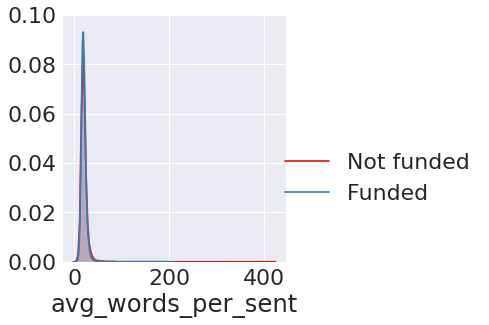

In [20]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'avg_words_per_sent', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.1));

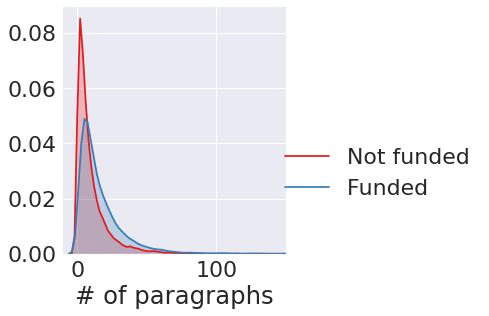

In [21]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'num_paragraphs', shade=True) \
    .add_legend() \
    .set(xlim=(-10, 150), xlabel='# of paragraphs');

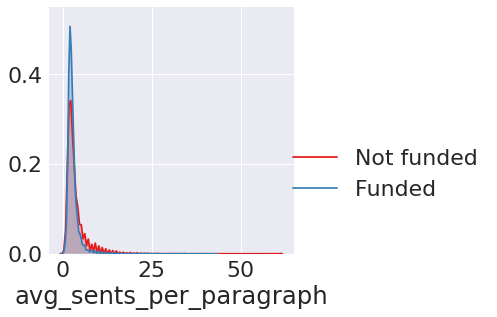

In [22]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'avg_sents_per_paragraph', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.55));

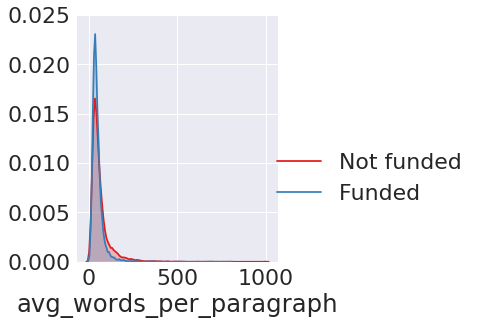

In [23]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'avg_words_per_paragraph', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.025));

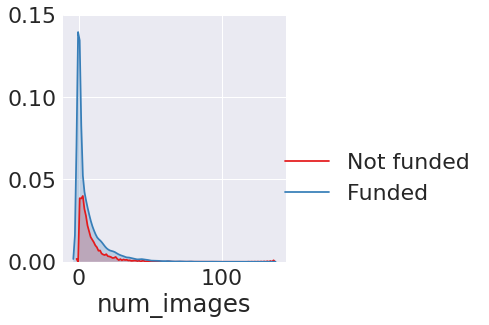

In [24]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'num_images', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.15));

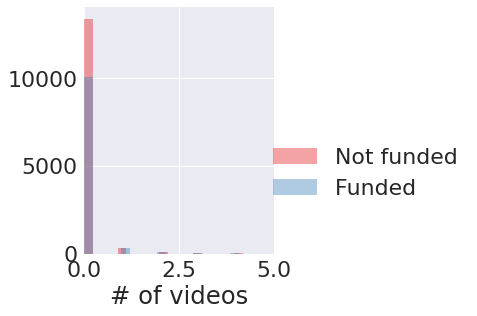

In [25]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.distplot, 'num_videos', kde=False) \
    .add_legend() \
    .set(xlim=(0, 5), xlabel='# of videos');

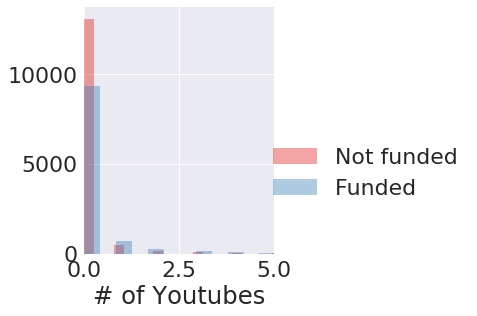

In [26]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.distplot, 'num_youtubes', kde=False) \
    .add_legend() \
    .set(xlim=(0, 5), xlabel='# of Youtubes');

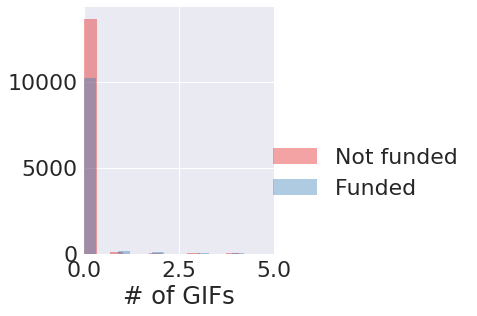

In [27]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.distplot, 'num_gifs', kde=False) \
    .add_legend() \
    .set(xlim=(0, 5), xlabel='# of GIFs');

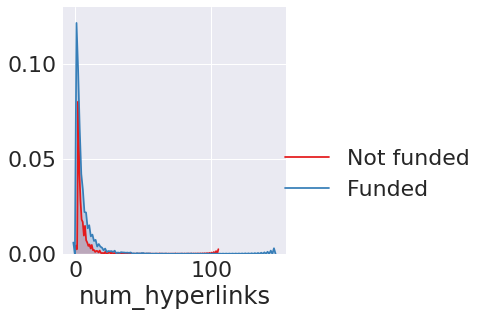

In [28]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'num_hyperlinks', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.13));

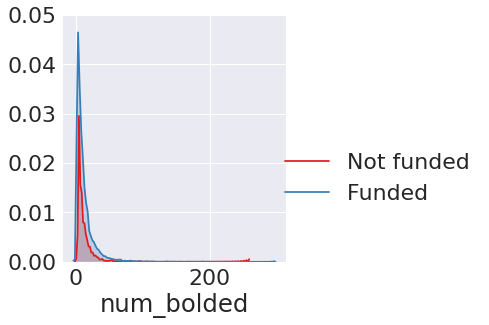

In [29]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'num_bolded', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.05));

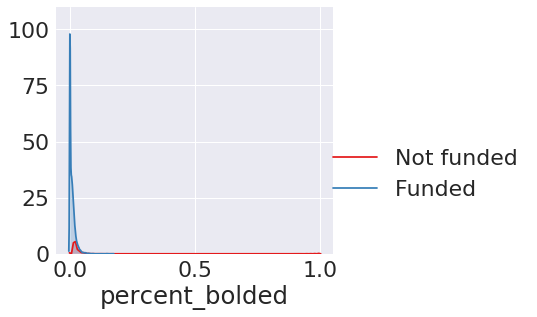

In [30]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(renamed_df, hue=' ', size=5, palette='Set1')

# Plot a kde plot
fig.map(sns.kdeplot, 'percent_bolded', shade=True) \
    .add_legend() \
    .set(ylim=(0, 110));

Out of these graphs, `num_words`, `num_sentences`, `num_exclams` and `num_apple_words` differ most between classes. It will be interesting to see what the model determines as the meta features most predictive of class.